# Star Wars: Best Episode?

## Introduction

Before the release of yet another episode of the Star Wars franchise, the team at [FiveThirtyEight](https://fivethirtyeight.com/) sought to find out if the American _Star Wars_ fans think the **"The Empire Strikes Back"** is the best movie of the franchise. To ascertain this, the team surveyed _Star Wars_ fans and received a total of 835 responses, a data which is available on their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). 

The episodes in contention of being the best are;


* **"The Phantom Menace"**      - Episode 1
* **"Attack of the Clones"**    - Episode 2
* **"Revenge of the Sith"**     - Episode 3
* **"A New Hope"**              - Episode 4
* **"The Empire Strikes Back"** - Episode 5
* **"Return of the Jedi"**      - Episode 6


In this current project, the survey data collected by the team will be used to achieve the current aims. The aims of this project are;


* To determine the most watched episode of the franchise
* To ascertain the highest-ranked episode


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

pd.set_option('display.max_columns', None)

## Read in & Explore Data

In [3]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1") # specify encoding - dataset not default utf-8 encoding 
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,4.0,3.0,6.0,5.0,2.0,Very favorably,Very favorably,Very favorably,

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [5]:
# define function to print unique values - it takes a datafame and column numbers
def unq_vals(df, x,y):
    for cols in df.columns[x:y]:
        print (cols, 'value_counts')
        print (df[cols].value_counts(dropna = False), '\n')

In [6]:
# print unique values for columns 1 & 2
unq_vals(star_wars, 1,3)

Have you seen any of the 6 films in the Star Wars franchise? value_counts
Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64 

Do you consider yourself to be a fan of the Star Wars film franchise? value_counts
Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64 



In [7]:
# print unique values for columns 3 to 8
unq_vals(star_wars, 3,9)

Which of the following Star Wars films have you seen? Please select all that apply. value_counts
Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64 

Unnamed: 4 value_counts
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64 

Unnamed: 5 value_counts
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64 

Unnamed: 6 value_counts
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: Unnamed: 6, dtype: int64 

Unnamed: 7 value_counts
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: Unnamed: 7, dtype: int64 

Unnamed: 8 value_counts
Star Wars: Episode VI Return of the Jedi    738
NaN        

In [8]:
# print unique values for columns 9 to 14
unq_vals(star_wars, 9,15)

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. value_counts
NaN    351
4.0    237
6.0    168
3.0    130
1.0    129
5.0    100
2.0     71
Name: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film., dtype: int64 

Unnamed: 10 value_counts
NaN    350
5.0    300
4.0    183
2.0    116
3.0    103
6.0    102
1.0     32
Name: Unnamed: 10, dtype: int64 

Unnamed: 11 value_counts
NaN    351
6.0    217
5.0    203
4.0    182
3.0    150
2.0     47
1.0     36
Name: Unnamed: 11, dtype: int64 

Unnamed: 12 value_counts
NaN    350
1.0    204
6.0    161
2.0    135
4.0    130
3.0    127
5.0     79
Name: Unnamed: 12, dtype: int64 

Unnamed: 13 value_counts
NaN    350
1.0    289
2.0    235
5.0    118
3.0    106
4.0     47
6.0     41
Name: Unnamed: 13, dtype: int64 

Unnamed: 14 value_counts
NaN    350
2.0    232
3.0    220
1.

### Observations

The data exploration above reveals apparent need for cleaning for the relevant columns for this project. These include ambiguity in column names and values that would make it difficult for statistical analysis.

* The second and third columns are named in such a way that may be handful when it requires to type out in coding and are prone to mistakes. Also, they contain 'Yes/No' values and in some cases NaN - where a respondent chose not to answer the questions.

  * **Have you seen any of the 6 films in the Star Wars franchise?**
  * **Do you consider yourself to be a fan of the Star Wars film franchise?**
  

* The next six subsequent columns where respondent are to select any (or all) of the episodes of the movie they have seen, have ambiguos names. Moreover, the values in each of the columns are either the name of the episode, which represents a respondent have seen the episode or NaN - respondent either did not see the episode or answered the question. These columns are;

    * **Which of the following Star Wars films have you seen? Please select all that apply.**
    * **Unnamed: 4**
    * **Unnamed: 5**
    * **Unnamed: 6**
    * **Unnamed: 7**
    * **Unnamed: 8**
    
    
* The following six columns were used for ranking each of the episodes. Like the previous six columns, they are ambigiously named and contain the values (1, 2, 3, 4, 5, 6, or NaN) used for ranking. The columns are;

    * **Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.**
    * **Unnamed: 10**
    * **Unnamed: 11**
    * **Unnamed: 12**
    * **Unnamed: 13**
    * **Unnamed: 14**

These mentioned issues will be addressed in the **Data Cleaning** section.

## Data Cleaning

In [9]:
# rename columns to intuitive names

star_wars.rename(columns={'Have you seen any of the 6 films in the Star Wars franchise?': 'seen_any', 
                          'Do you consider yourself to be a fan of the Star Wars film franchise?': 'Star_Wars_fan'}, inplace=True)

In [10]:
# define mapping - 'Yes' = True, 'No' = False
conv_to_bool = {'Yes': True,
            'No': False
            }

# apply mapping on columns 1 & 2
for col in star_wars.columns[1:3]:
    star_wars[col] = star_wars[col].map(conv_to_bool)

In [11]:
unq_vals(star_wars, 1,3)

seen_any value_counts
True     936
False    250
Name: seen_any, dtype: int64 

Star_Wars_fan value_counts
True     552
NaN      350
False    284
Name: Star_Wars_fan, dtype: int64 



In [12]:
# define mapping function -  name of movie = True, NaN = False

def ep_bool(val):
    if pd.isnull(val):
        return False
    else:
        return True
    
# apply mapping function    
star_wars.iloc[:,3:9] = star_wars.iloc[:,3:9].applymap(ep_bool)

In [13]:
# rename columns 3-8 to 'seen_1' through 'seen_6' - for all six episodes
for c in range (3,9):
    star_wars = star_wars.rename(columns = {star_wars.columns[c]: 
                                            'seen_{}'.format(c-2)})

In [14]:
# print unique values for columns 1 & 2

unq_vals(star_wars, 3,9)

seen_1 value_counts
True     673
False    513
Name: seen_1, dtype: int64 

seen_2 value_counts
False    615
True     571
Name: seen_2, dtype: int64 

seen_3 value_counts
False    636
True     550
Name: seen_3, dtype: int64 

seen_4 value_counts
True     607
False    579
Name: seen_4, dtype: int64 

seen_5 value_counts
True     758
False    428
Name: seen_5, dtype: int64 

seen_6 value_counts
True     738
False    448
Name: seen_6, dtype: int64 



In [15]:
# rename columns 9-14 to 'ranking_1' through 'ranking_6'

for c in range (9,15):
    star_wars = star_wars.rename(columns = {star_wars.columns[c]: 
                                            'ranking_{}'.format(c-8)})
    star_wars[star_wars.columns[9:15]].astype(float)

In [16]:
# print unique values for columns 9 to 14
unq_vals(star_wars, 9,15)

ranking_1 value_counts
NaN    351
4.0    237
6.0    168
3.0    130
1.0    129
5.0    100
2.0     71
Name: ranking_1, dtype: int64 

ranking_2 value_counts
NaN    350
5.0    300
4.0    183
2.0    116
3.0    103
6.0    102
1.0     32
Name: ranking_2, dtype: int64 

ranking_3 value_counts
NaN    351
6.0    217
5.0    203
4.0    182
3.0    150
2.0     47
1.0     36
Name: ranking_3, dtype: int64 

ranking_4 value_counts
NaN    350
1.0    204
6.0    161
2.0    135
4.0    130
3.0    127
5.0     79
Name: ranking_4, dtype: int64 

ranking_5 value_counts
NaN    350
1.0    289
2.0    235
5.0    118
3.0    106
4.0     47
6.0     41
Name: ranking_5, dtype: int64 

ranking_6 value_counts
NaN    350
2.0    232
3.0    220
1.0    146
6.0    145
4.0     57
5.0     36
Name: ranking_6, dtype: int64 



### Summary

In the **Data Cleaning** section, the relevant columns as mentioned in the data exploration section, were cleaned for consistency and to make it easy for statistical analysis. 

Specifically, the processes include renaming the columns and converting  some of the mentioned columns to a Boolean type. 

* For columns 1 and 2;
    * The columns 'Have you seen any of the 6 films in the Star Wars franchise?' and 'Do you consider yourself to be a fan of the Star Wars film franchise?' were renamed to **'seen_any'** and **'Star_Wars_fan'** respectively.
    
    * The columns were also converted to a Boolean type where they contained, True or False, and in some cases NaN for missing values.


* For 3-8 columns;
    * Similarly, the next six columns were renamed 'Which of the following Star Wars films have you seen? Please select all that apply.', to 'Unnamed: 8' to **'seen_1**, through **'seen_6**

    * The columns were converted to a Boolean type, where NaN values were converted to **False** and in cases where the value is the name of the movie, **True**


* Columns 9-14;
    * Again, the following six columns used for ranking the episodes of the movie were renamed to **'ranking_1'** through **'ranking_6'** from the previous 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' through 'Unnamed: 14'.


## Data Analysis

In [17]:
# the average ranking for each ranking column
rankings_mean = star_wars[star_wars.columns[9:15]].mean()
print(rankings_mean)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


In [18]:
# compute sum of each seen columns

seen_totals = star_wars[star_wars.columns[3:9]].sum()
print(seen_totals)

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


In [19]:
labels = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6'] #label representing each episode for xticks
x = np.arange(len(labels))  # the label locations

def bar_chart(df, main_title=None):
    df_chart = df.plot.bar(rot = 30)
   
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks(x, labels)
    plt.title (main_title)
    
    return df_chart

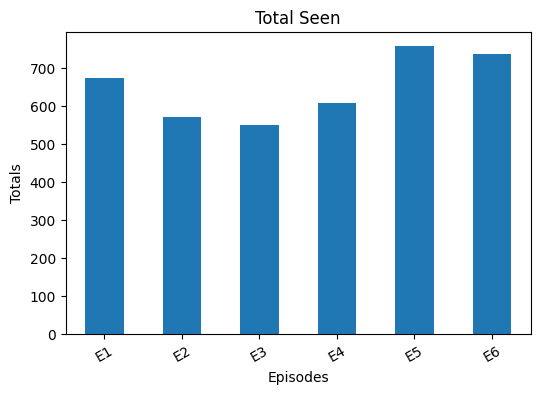

In [20]:
seen_totals_chart = bar_chart(seen_totals, 'Total Seen')
plt.xlabel('Episodes')
plt.ylabel('Totals')
seen_totals_chart;

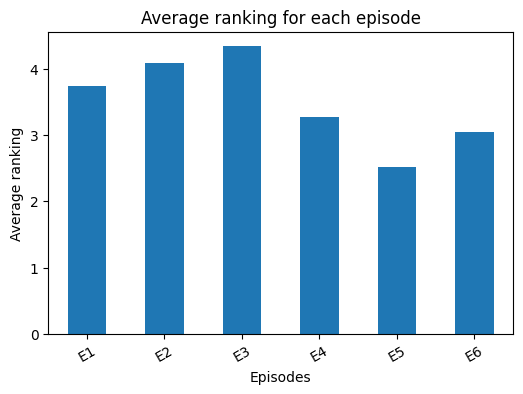

In [21]:
rankings_mean_chart = bar_chart(rankings_mean, 'Average ranking for each episode')
plt.xlabel('Episodes')
plt.ylabel('Average ranking')
rankings_mean_chart;

### Observation

* It appears the Episodes seen is positively correlated to the episodes ranking. The more the respondents have seen an episode, the higher the ranking and vice versa.

* The Episode 5 is the most seen episode and it is the highest ranked while Episode 3 is the least seen episode and lowest ranked.

## Analysis on those who have seen all 6 episodes

In this section, analysis will be based on respondents who have seen all the 6 episodes 

In [22]:
# add a new column to sum the number of episodes a respondent has seen
star_wars['seen_counts'] = star_wars[star_wars.columns[3:9]].sum(axis=1)

In [23]:
seen_all = star_wars[star_wars['seen_counts'] == 6]
unq_vals(seen_all, 1,3)

seen_any value_counts
True    471
Name: seen_any, dtype: int64 

Star_Wars_fan value_counts
True     411
False     60
Name: Star_Wars_fan, dtype: int64 



In [24]:
seen_all_rankings = seen_all[seen_all.columns[9:15]].mean()
seen_all_rankings

ranking_1    4.237792
ranking_2    4.326964
ranking_3    4.253191
ranking_4    2.866242
ranking_5    2.380042
ranking_6    2.932059
dtype: float64

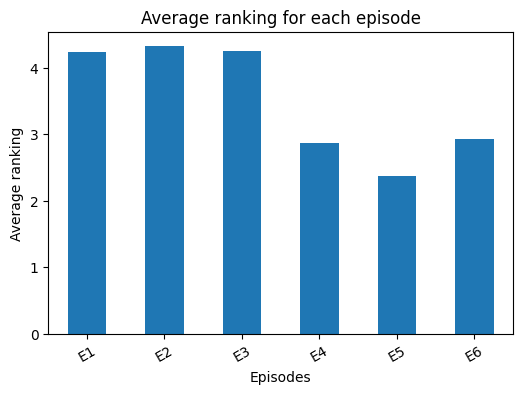

In [25]:
seen_all_rankings_chart = bar_chart(seen_all_rankings, 'Average ranking for each episode')
plt.xlabel('Episodes')
plt.ylabel('Average ranking')
seen_all_rankings_chart;

### Observation

The analysis above shows a significantly interesting revelations about the dataset.

* About 50% of the respondents have seen all the six episodes of the franchise.

* There are 60 respondents who have seen all the six episodes who are not fans of the franchise.

* Those who have seen all the six episodes rank Episode 5 the highest whilst Episode 3 is the lowest-ranked. This is consistent with the rankings of all the respondents including those who have seen at least one episode.

## Analysis by Gender

In this section, the data will be split into two groups based on whether a respondent is a Male of Female. This is to analyse the most viewed and the highest-ranked movie separately for each group of gender.

In [26]:
star_wars["Gender"].value_counts(dropna= False)

Female    549
Male      497
NaN       140
Name: Gender, dtype: int64

In [27]:
male_resp = star_wars[star_wars["Gender"] == "Male"]
female_resp = star_wars[star_wars["Gender"] == "Female"]

In [28]:
unq_vals(male_resp, 1,3)

seen_any value_counts
True     423
False     74
Name: seen_any, dtype: int64 

Star_Wars_fan value_counts
True     303
False    120
NaN       74
Name: Star_Wars_fan, dtype: int64 



In [29]:
unq_vals(female_resp, 1,3)

seen_any value_counts
True     397
False    152
Name: seen_any, dtype: int64 

Star_Wars_fan value_counts
True     238
False    159
NaN      152
Name: Star_Wars_fan, dtype: int64 



In [30]:
# percentage of males who have seen any episode 
round(male_resp['seen_any'].sum() / len(male_resp['Gender']) * 100)

85.0

In [31]:
# percentage of females who have seen any episode 
round(female_resp['seen_any'].sum() / len(female_resp['Gender']) * 100)

72.0

In [32]:
# percentage of males who have seen any episode and are fans
male_resp['Star_Wars_fan'].sum() / male_resp['seen_any'].sum() * 100

71.63120567375887

In [33]:
# percentage of females who have seen any episode and are fans
female_resp['Star_Wars_fan'].sum() / female_resp['seen_any'].sum() * 100

59.949622166246854

### Observation

* The Gender column contains Male, Female values which represent the gender of a respondent and in some cases NaN where respondents did not answer. The data shows

    * There were more Female respondents than there were Males
    * Also, there were some missing values represented by NaN which was around 8% of the data. These values will be ignored in further analysis as doing so would not impact on the outcome.
    
    
* Moreover, the Gender column shows more male respondents have seen at least one episode of the franchise than females have.


* Of the respondents who have seen at least one episode, more males consider themselves as fans of the franchise than female repsondents.

In [34]:
male_seen_totals = male_resp[male_resp.columns[3:9]].sum()
print(male_seen_totals)

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64


In [35]:
female_seen_totals = female_resp[female_resp.columns[3:9]].sum()
print(female_seen_totals)

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64


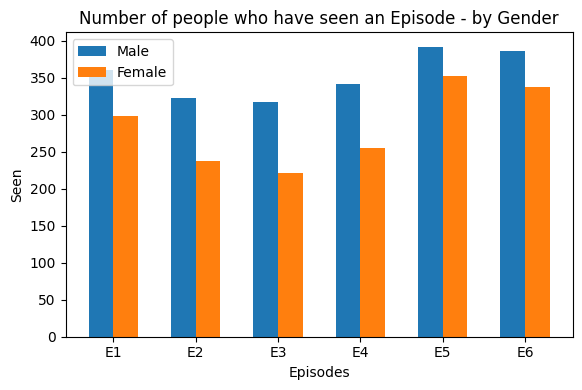

In [36]:
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, male_seen_totals, width, label='Male')
bars2 = ax.bar(x + width/2, female_seen_totals, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels.
ax.set_xlabel('Episodes')
ax.set_ylabel('Seen')
ax.set_title('Number of people who have seen an Episode - by Gender')
plt.xticks(x, labels)

ax.legend()


fig.tight_layout()

plt.show()

In [37]:
male_rankings_mean = male_resp[male_resp.columns[9:15]].mean()
print(male_rankings_mean)

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64


In [38]:
female_rankings_mean = female_resp[female_resp.columns[9:15]].mean()
print(female_rankings_mean)

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64


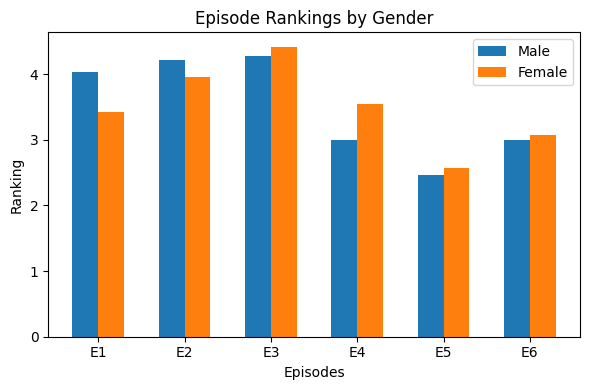

In [39]:
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, male_rankings_mean, width, label='Male')
bars2 = ax.bar(x + width/2, female_rankings_mean, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels
ax.set_xlabel('Episodes')
ax.set_ylabel('Ranking')
ax.set_title('Episode Rankings by Gender')
plt.xticks(x, labels)

ax.legend()

fig.tight_layout()

plt.show()

### Observations

Further investigations of the Gender column with regards to the most viewed movie and the highest-ranked movie reveals that;

* The Episode 5 of the franchise is the most viewed amongst both groups of respondents - Males & Females.  

* Similarly, the most seen episodes are the highest ranked movie by each group and vice versa which is a reflection of the total outcome. 

* There appears to be a pattern where the highest-ranked movie by each group is also the most viewed and the lowest-ranked movie the least watched. It appears there is correlation between the movie seen and ranking.

* Male respondents generally ranked the episodes 3, 4, 5 & 6 higher than female respondents. Interestingly, female respondents ranked episodes 1 & 2 higher than male respondents.  

# Conclusion

This current project mirrors the project by the team at [FiveThirtyEight](https://fivethirtyeight.com/) in determining the best episode of the six episodes of Star Wars. The team hypothesized that **"The Empire Strikes Back"**, Episode 5 of the franchise is the best, and sought to verify that through a [survey](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) of American Star Wars fans. The six episodes are

* **"The Phantom Menace"** - Episode 1
* **"Attack of the Clones"** - Episode 2
* **"Revenge of the Sith"** - Episode 3
* **"A New Hope"** - Episode 4
* **"The Empire Strikes Back"** - Episode 5
* **"Return of the Jedi"** - Episode 6

The current project used the survey collected by the team. The analysis in this project took 2 approaches - general and narrow analysis. 

* A general analysis was made on the entire dataset to determine the most watched and the highest-ranked episode. 

* Whiles in the narrow analysis, the dataset was segmented based on gender of the respondents

* A similar narrow analysis was made with a narrowed dataset of respondents who have seen all the episodes.

The findings in this current project reveal that;

* Generally, the most watched episode is **"The Empire Strikes Back"**. It is also, the highest-ranked episodes amongst all respondents.

* **"The Empire Strikes Back"** is still the most watched and highest-ranked episode amongst respondents who have seen all six episodes of the franchise.

* Similarly, the most watched and highest-ranked episode is **"The Empire Strikes Back"** amongst both male and female respondents.

The findings in this current project is consistent with the hypothesis and [findings](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/) of the team at FiveThirtyEight. 

### Potential Next Steps

The data in this project has potential for further exploration and analysis. There are more columns that can be explored and delved into to provide interesting findings

* Potentially, the "Education", "Location (Census Region)", and "Which character shot first?" may be explored and could reveal interesting patterns

* What could be said of the characters, most liked, or disliked, most controversial?